# Ch 9: Plotting and Visualization

%matplotlib notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(10, 6))
np.random.seed(42)

## 9.1 A Brief matplotlib API Primer

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

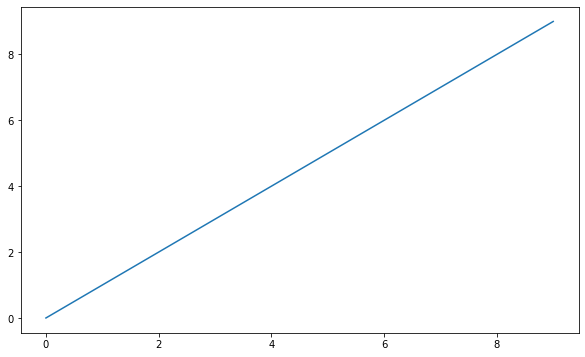

In [5]:
plt.plot(data)

### Figures and Subplots

Create a new figure iwith `plt.figure()`

In [6]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

Create one or more subplots using `.add_subplot()`:

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

This figure should be 2 x 2 (up to four plots total) and this is number 1.  
Create two more:

In [8]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Must put all the plots in the same cell when using Jupyter notebook.

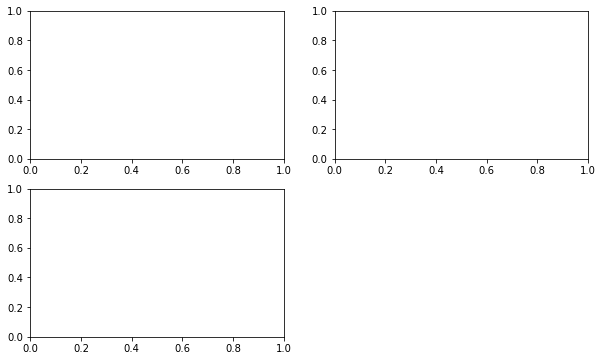

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When plotting using `plt.plot()`, matplotlib draws on the last figure and subplot used.

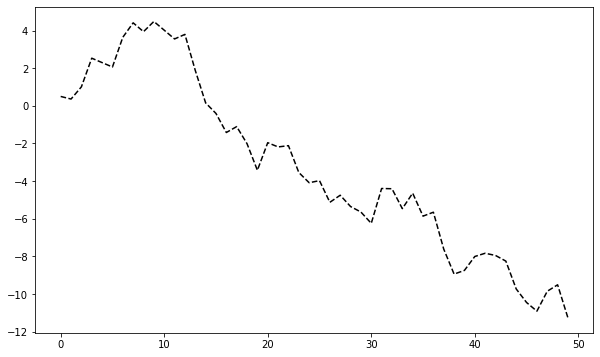

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

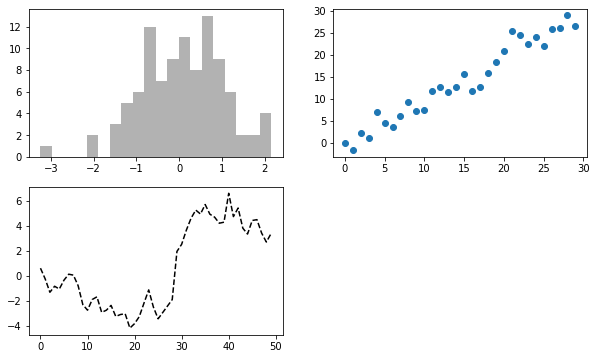

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Quickly create a grid of subplots.

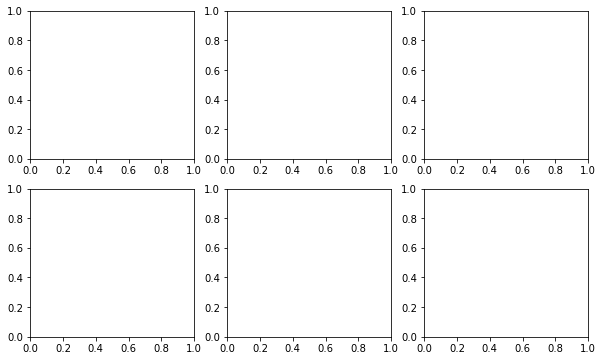

In [14]:
fig, axes = plt.subplots(2,3)

#### Adjusting the spacing around subplots (padding)

In [15]:
# subplots_adjust(left=None, bottom=None, right=None, top=None,
#                wspace=None, hspace=None)

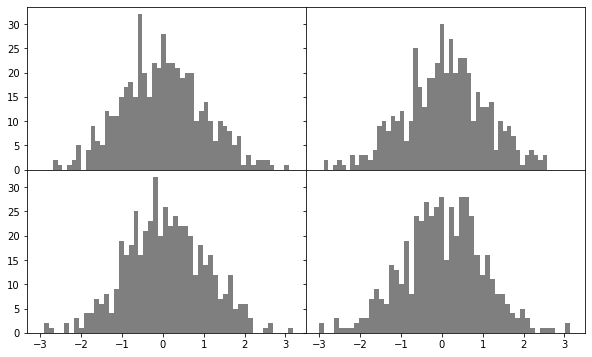

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
np.random.randint(10, 50, 1)

array([20])

For some reason, this doesn't work the first time you run it:

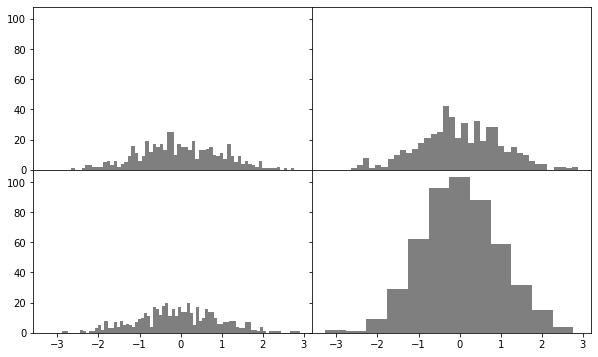

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=abs(np.random.randint(100)), color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

ax.plot(x, y, 'g--')  
\# The same as   
ax.plot(x, y, linestyle='--', color='g')  

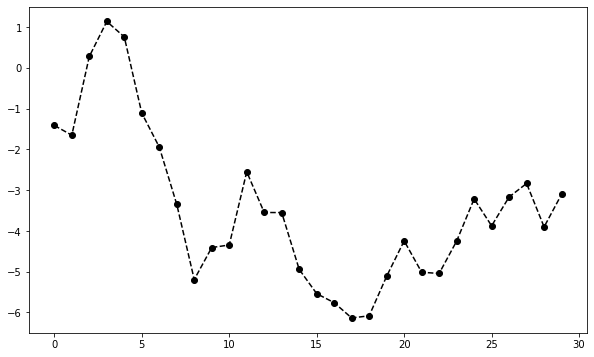

In [20]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

Can be written more explicitly as:

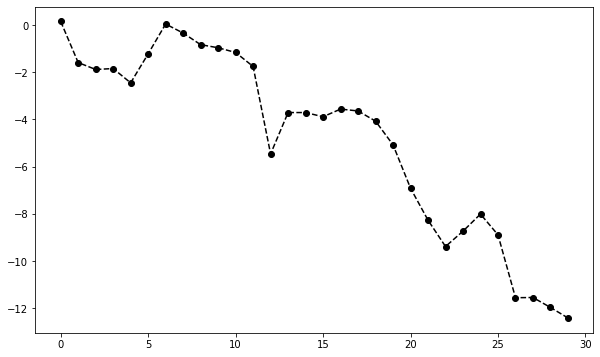

In [21]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, subsequent points are linearly interpolated by default. This can be altered with `drawstyle`:

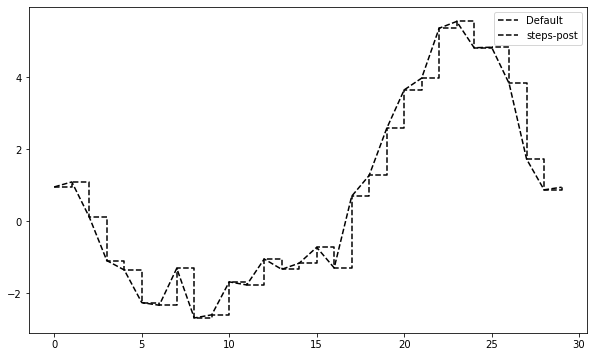

In [22]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

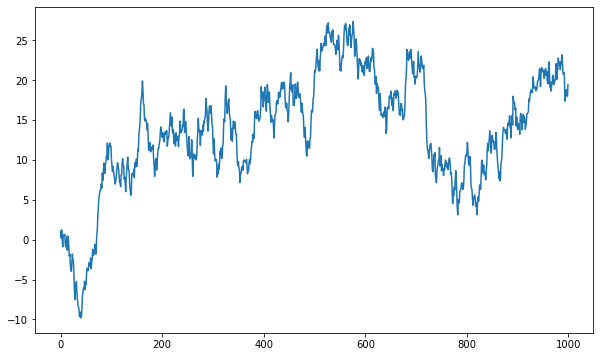

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

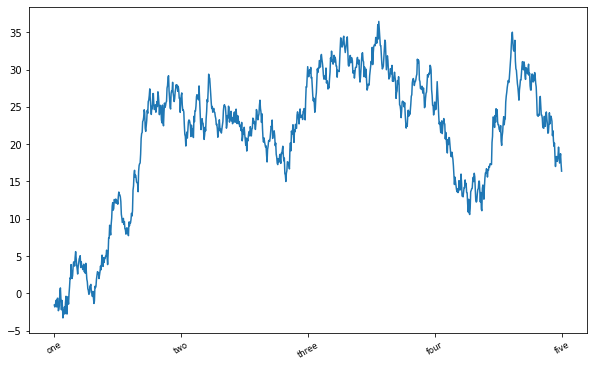

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

Text(0.5, 0, 'Stages')

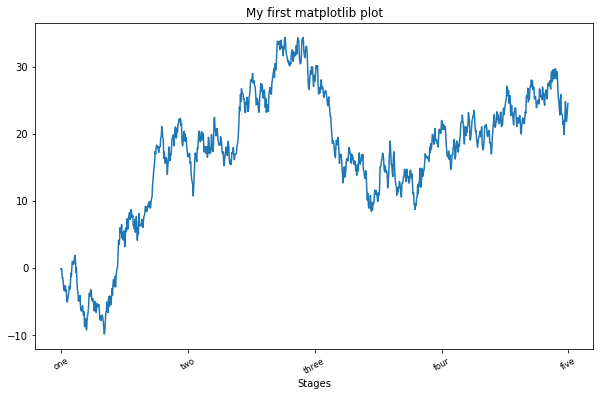

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

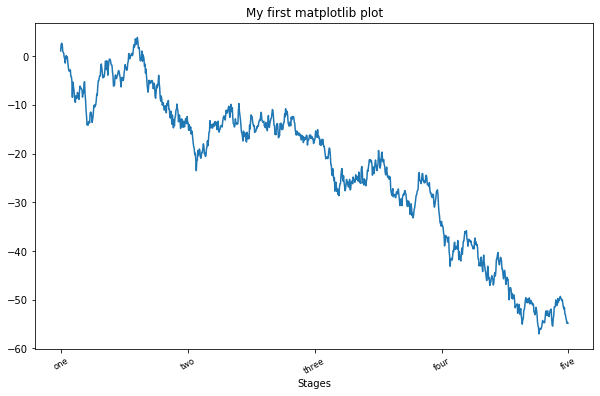

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

# ax.set_title('My first matplotlib plot')
# ax.set_xlabel('Stages')

props= {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

In [27]:
from numpy.random import randn

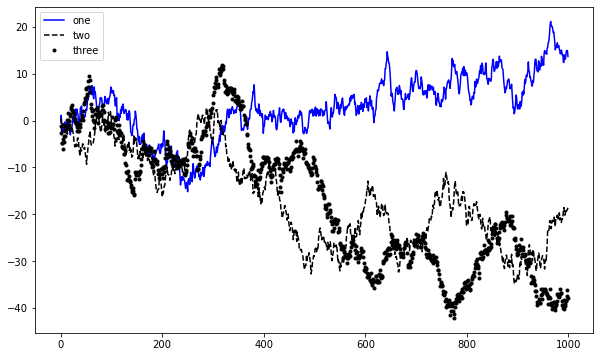

In [28]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one', color='blue')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')  # Alternatively: plt.legend()

See other options for `loc` argument:

In [29]:
# ax.legend?

### Annotations and Drawing on a Subplot

In [30]:
# ax.text(x, y, 'Hello World!', family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

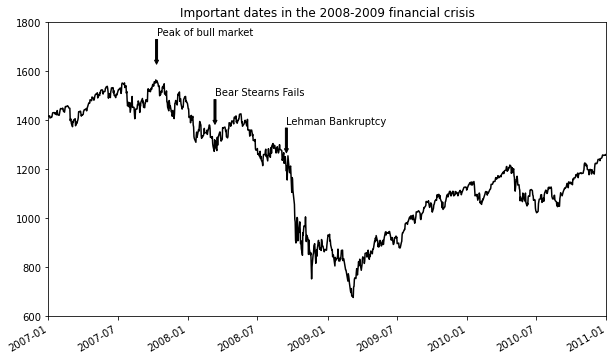

In [31]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

To create a shape, create a patch object, `shp` and add it to a subplot by calling `.add_patch(shp)`:

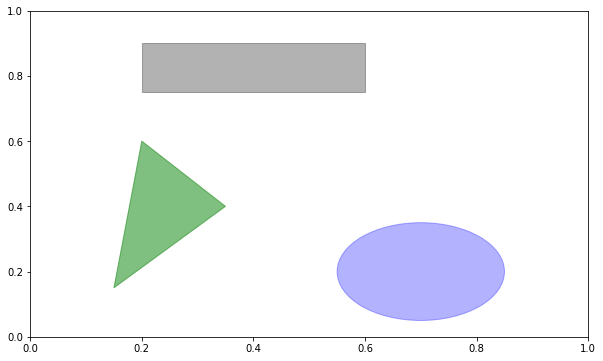

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

Save the active figure using `plt.savefig()`. The filetype is inferred from the file extension.

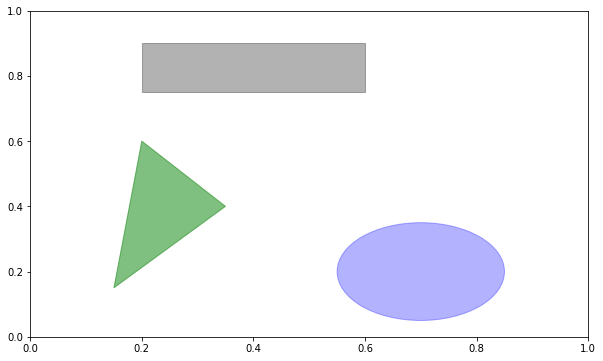

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

`savefig` can also write to any file-like object, such as **BytesIO**:

In [34]:
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 720x432 with 0 Axes>

### matplotlib Configuration

Use `rc` to set defaults.

Set the default figure size to be 10 x 10:

In [35]:
plt.rc('figure', figsize=(10,10))

Easily write your options in a dict:

In [36]:
fontOptions = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 10
}

plt.rc('font', **fontOptions)

In [37]:
# plt.rc?

## 9.2 Plotting with pandas and seaborn

In [38]:
plt.rc('figure', figsize=(10,6))

### Line Plots

<AxesSubplot:>

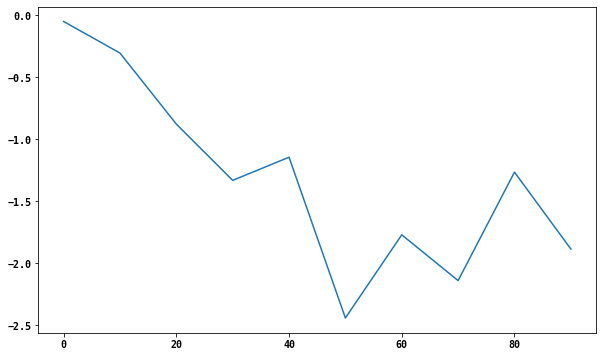

In [39]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

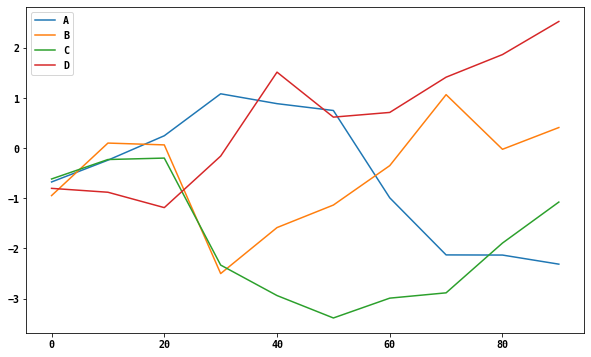

In [40]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

In [42]:
df.head()

,A,B,C,D
0,-0.674114,-0.945463,-0.614355,-0.801430
10,-0.239366,0.101644,-0.226487,-0.878852
20,0.247521,0.065224,-0.197913,-1.185491
30,1.084112,-2.500707,-2.330761,-0.158267
40,0.887585,-1.583473,-2.938840,1.515977


### Bar Plots

`plot.bar()` and `plot.barh()` make vertical and horizontal bar plots

<AxesSubplot:>

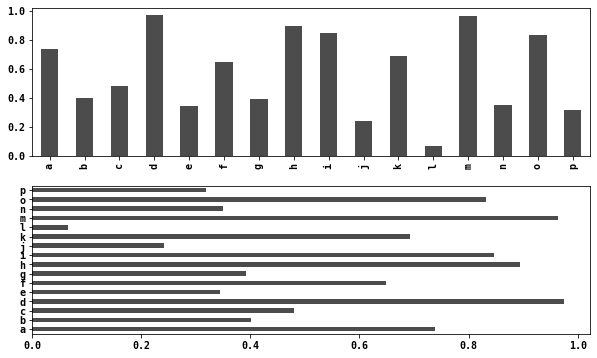

In [44]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [59]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.473554,0.790606,0.280113,0.837119
two,0.644151,0.397522,0.423417,0.925992
three,0.217791,0.693363,0.707294,0.922450
four,0.713164,0.584467,0.902523,0.829132
five,0.716776,0.032578,0.373520,0.631890
six,0.522251,0.319318,0.144424,0.552997


<AxesSubplot:>

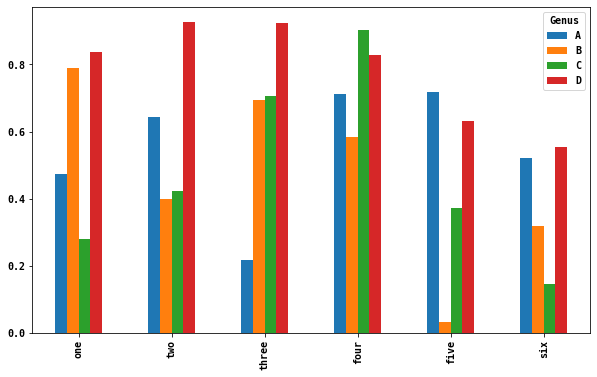

In [60]:
df.plot.bar()

Create stacked bar plots by passing `stacked=True`

<AxesSubplot:>

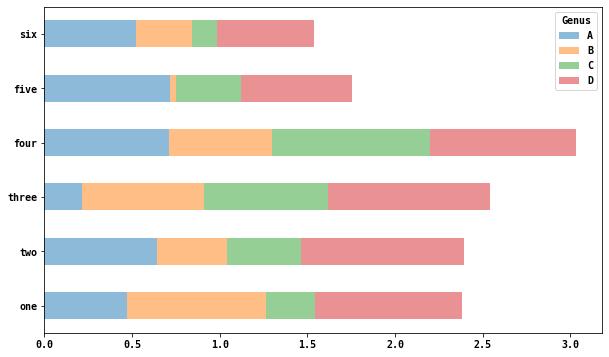

In [63]:
df.plot.barh(stacked=True, alpha=0.5)

In [64]:
# plt.close('all')

A useful recipe for bar plots is to visualize a Series's value frequency using `.value_counts()`

<AxesSubplot:>

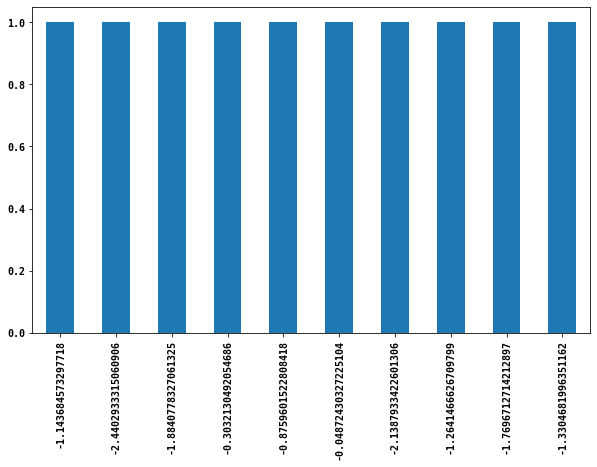

In [66]:
s.value_counts().plot.bar()

Using the tipping data set, make a stacked bar plot showing the percentage of data points for each party size on each day:

In [67]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [78]:
partyCounts = pd.crosstab(tips['day'], tips['size'])
partyCounts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


Not many 1- or 6- person parties, let's drop them:

In [82]:
partyCounts = partyCounts.loc[:, 2:5]
partyCounts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Normalize so each row adds up to 1 (% of total for that day):

In [92]:
partyPcts = partyCounts.div(partyCounts.sum(axis=1), axis=0)
partyPcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


Text(0.5, 1.0, 'Fraction of parties by size on each day')

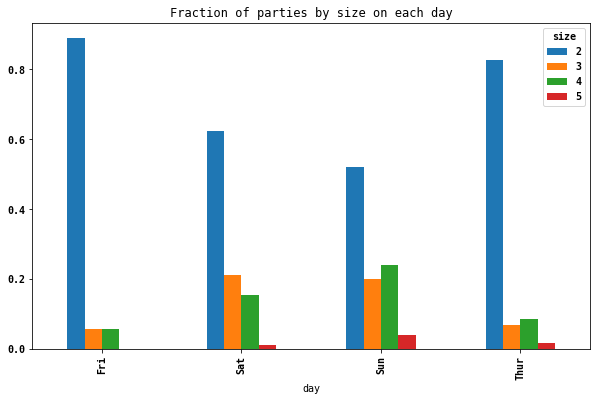

In [95]:
partyPcts.plot.bar()
plt.title('Fraction of parties by size on each day')

Let's look at the tipping percentage by day, using **seaborn**:

In [96]:
import seaborn as sns

In [97]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


Text(0.5, 1.0, 'Tipping percentage by day with error bars')

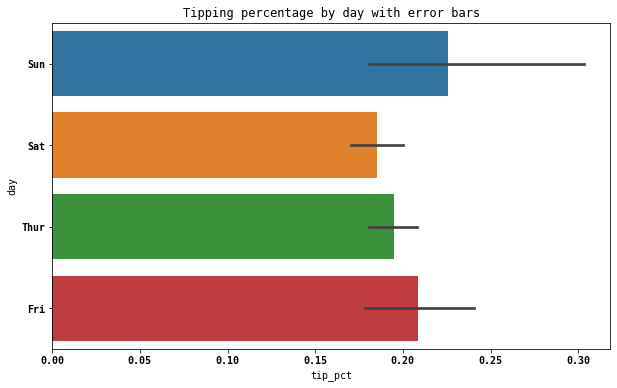

In [101]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
plt.title('Tipping percentage by day with error bars')

Use the `hue` option in `sns.barplot()` to split by another categorical value:

Text(0.5, 1.0, 'Tipping percentage by day and time')

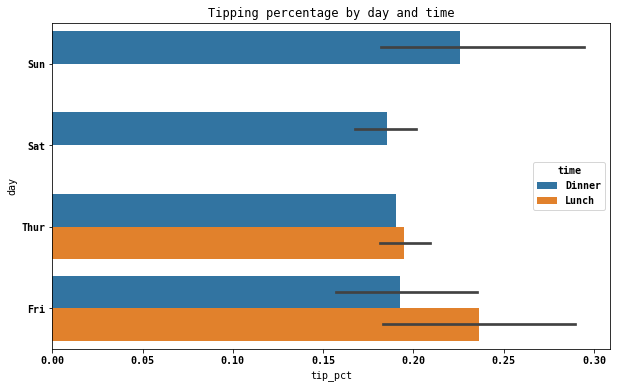

In [102]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.title('Tipping percentage by day and time')

Use `sns.set()` to switch between different plot appearances.

In [103]:
sns.set(style='whitegrid')

### Histograms and Density Plots

Text(0.5, 1.0, 'Histogram of tip percentages')

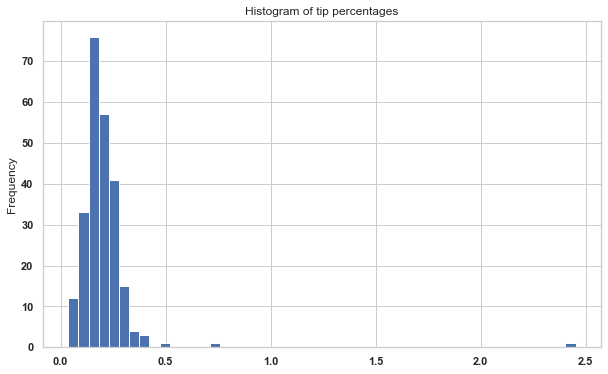

In [105]:
tips['tip_pct'].plot.hist(bins=50)
plt.title("Histogram of tip percentages")

Text(0.5, 1.0, 'Density plot of tip percentages')

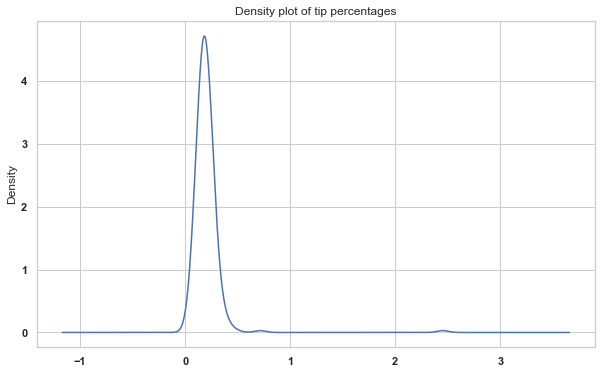

In [106]:
tips['tip_pct'].plot.density()
plt.title('Density plot of tip percentages')

Make a density plot using seaborn's `.distplot()` method:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized histogram of normal mixture with density estimate')

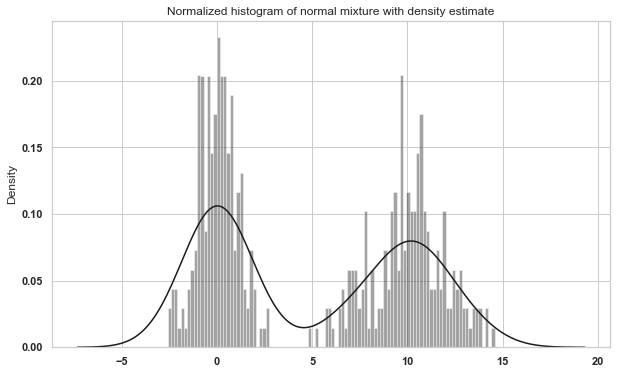

In [111]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')
plt.title('Normalized histogram of normal mixture with density estimate')

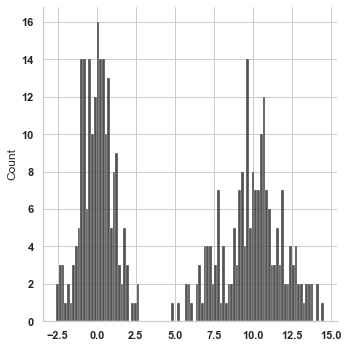

In [112]:
sns.displot(values,bins=100,color='k')

<AxesSubplot:ylabel='Count'>

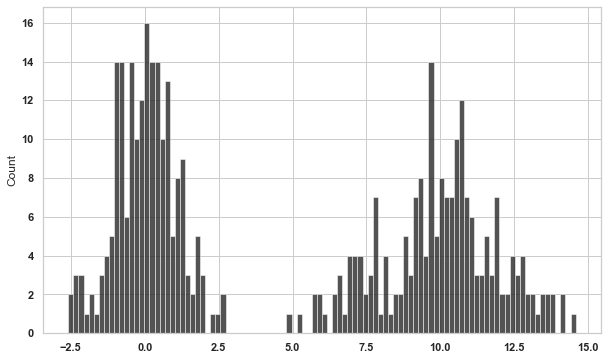

In [113]:
sns.histplot(values,bins=100,color='k')

### Scatter or Point Plots

In [114]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
transData = np.log(data).diff().dropna()
transData[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [117]:
# macro.head()

In [118]:
# macro[['cpi', 'm1', 'tbilrate', 'unemp']].head()

Use seaborn's `.regplot()` method to make a scatter plot and fit a linear regression line:

Text(0.5, 1.0, 'Changes in log m1 vs log unemp')

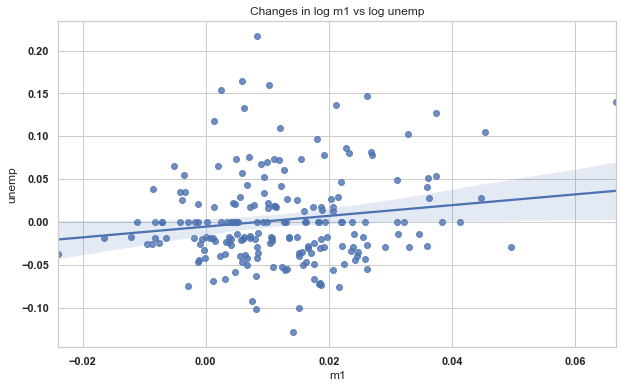

In [120]:
sns.regplot(x='m1', y='unemp', data=transData)
plt.title('Changes in log %s vs log %s' % ('m1', 'unemp'))

Set up a *scatter plot matrix* using seaborn's `.pairplot()` function:

Text(0.5, 1.0, 'Pair plot matrix of statsmodels macro data')

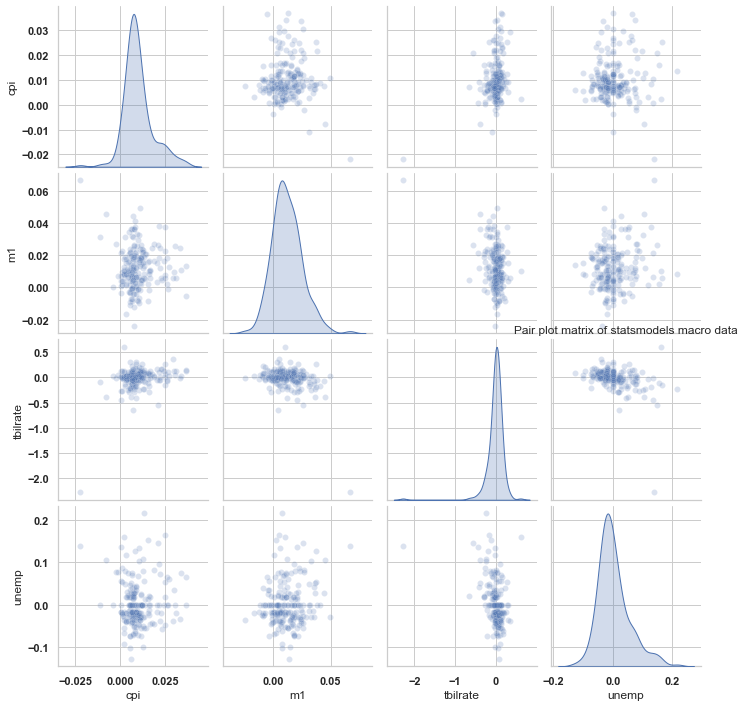

In [121]:
sns.pairplot(transData, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.title("Pair plot matrix of statsmodels macro data")

### Facet Grids and Categorical Data

Use seaborn's `.factorplot()` for faceted plots:

Text(0.5, 0.98, 'Tipping percentage by day/time/smoker')

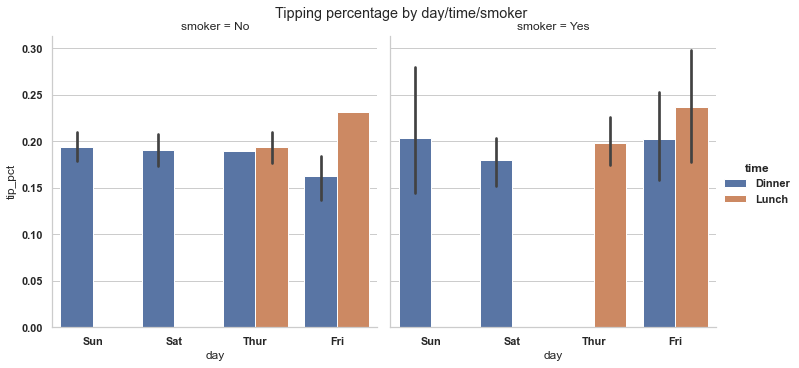

In [145]:
# plt.title('Tipping percentage by day/time/smoker')
g = sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Tipping percentage by day/time/smoker')

Instead of grouping by 'time', add one row per time value:

Text(0.5, 0.98, 'tip_pct by dat; facet by time/smoker')

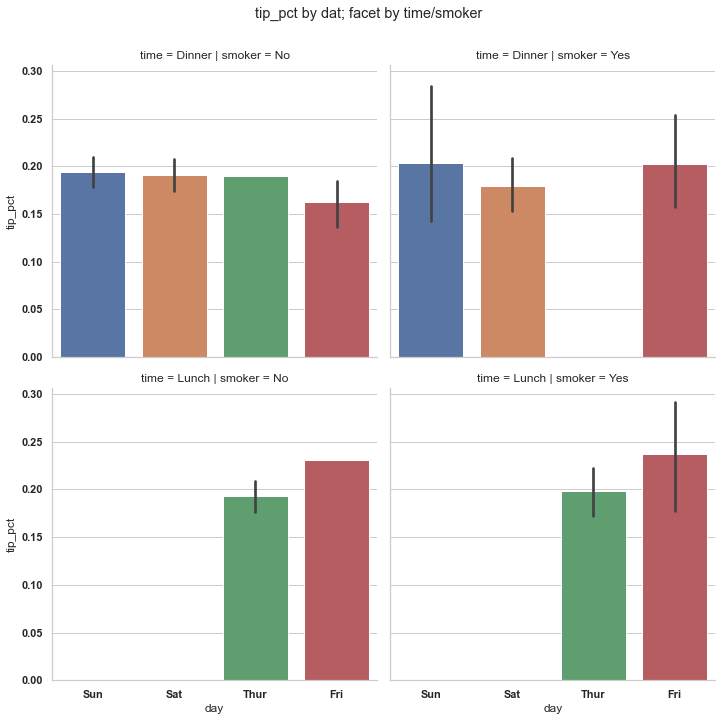

In [144]:
g = sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
           kind='bar', data=tips[tips.tip_pct < 1])
plt.subplots_adjust(top=0.9)
g.fig.suptitle("tip_pct by dat; facet by time/smoker")

~sns.factorplot()~ `.catplot()` supports other plot types, like box plot:

Text(0.5, 1.0, 'Box plotof tip_pct by day')

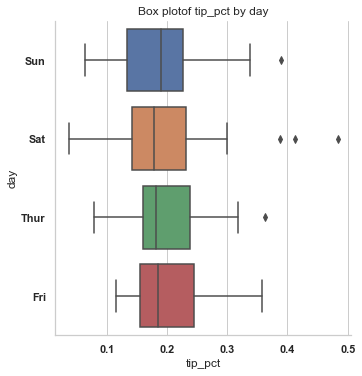

In [149]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])
plt.title('Box plotof tip_pct by day')

## 9.3 Other Python Visualization Tools

Create dynamic, interactive graphics for the web:  
**Bokeh**: http://bokey.pydata.org/  
**Plotly**: https://github.com/plotly/plotly.py

## 9.4 Conclusion